# Exercise 8) Part 1: Image classification

In [44]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

## Loading the Fashion-MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Shape of training images
x_train.shape

(60000, 28, 28)

In [4]:
# Shape of training labels
y_train.shape

(60000,)

## Preprocessing

In [6]:
x_train.min(), x_train.max()

(0, 255)

In [8]:
# Scale values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train.min(), x_train.max()

(0.0, 1.0)

## Let's have a look at the data

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

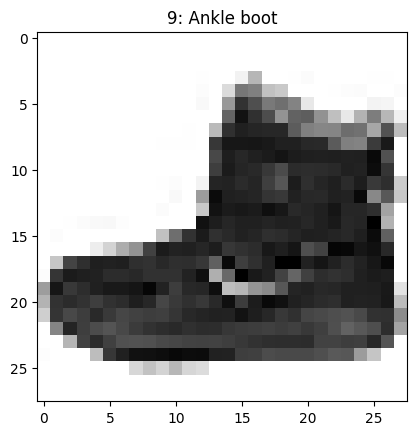

In [15]:
# First training sample
idx = 0
img = x_train[idx]
label = y_train[idx]

# Plot image with class label
plt.imshow(img, cmap="binary")
plt.title(f"{label}: {class_names[label]}")
plt.show()

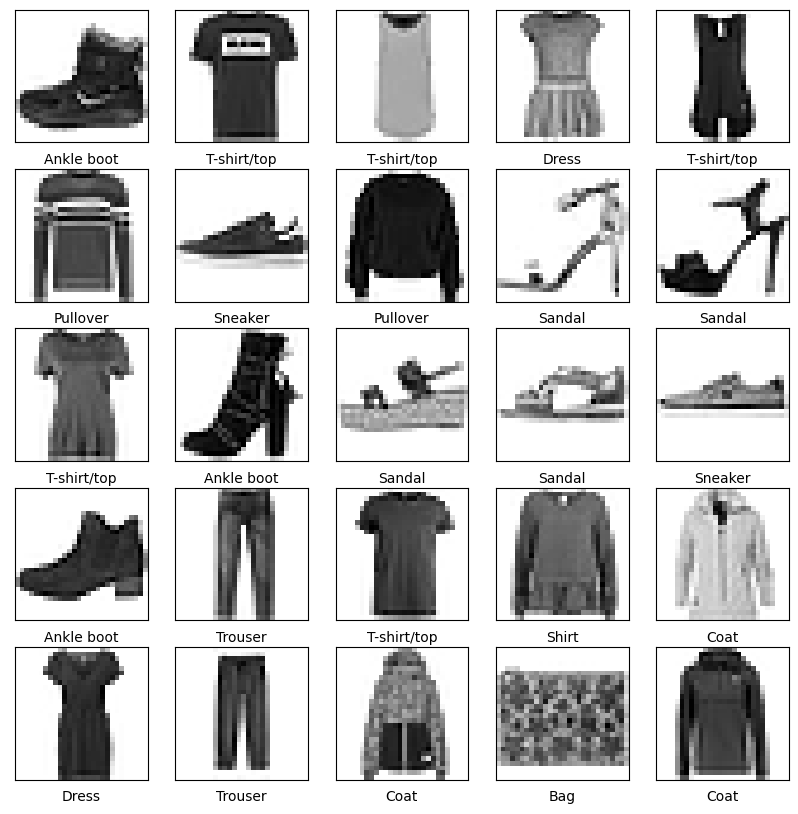

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Model evaluation 1) Training & validation set

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/holdout-validation_01.png" width="1000" align="left">

In [ ]:
# !pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split  

# Split into 80% training and 20% validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


## Building a Multi-Layer Perceptron (MLP)

In [48]:
import tensorflow as tf
from keras import layers

def build_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    return model

model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras import optimizers

opt = optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [21]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7484 - accuracy: 0.7530 - val_loss: 0.5342 - val_accuracy: 0.8163
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4968 - accuracy: 0.8288 - val_loss: 0.4714 - val_accuracy: 0.8386
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4486 - accuracy: 0.8429 - val_loss: 0.4539 - val_accuracy: 0.8427
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4211 - accuracy: 0.8534 - val_loss: 0.4355 - val_accuracy: 0.8459
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4008 - accuracy: 0.8587 - val_loss: 0.4194 - val_accuracy: 0.8521
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3847 - accuracy: 0.8644 - val_loss: 0.4017 - val_accuracy: 0.8591
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3713 - accuracy: 0.8686 - val_loss: 0.4161 - val_accuracy:

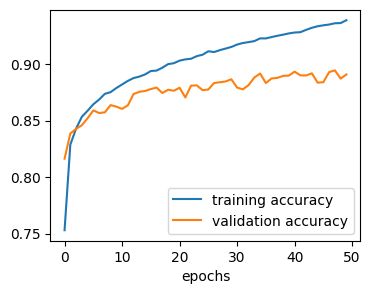

In [157]:
# Plot accuracy
plt.figure(figsize=(4, 3))
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.show()

**How to interpret the loss curve?**

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*lARssDbZVTvk4S-Dk1g-eA.png" width=500 align="left">

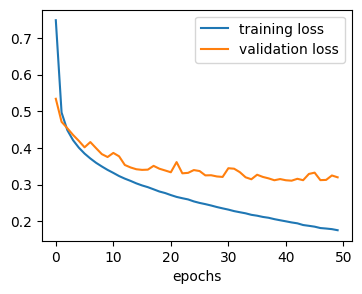

In [156]:
# Plot loss
plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("epochs")
plt.show()

## Check how well the model does on our test data

In [ ]:
# Get predictions for test data
y_predicted = model.predict(x_test)

In [25]:
y_predicted.shape

(10000, 10)

In [83]:
# Get prediction for a test image 
img = x_test[12]
pred = y_predicted[12]
true_class = y_test[12]

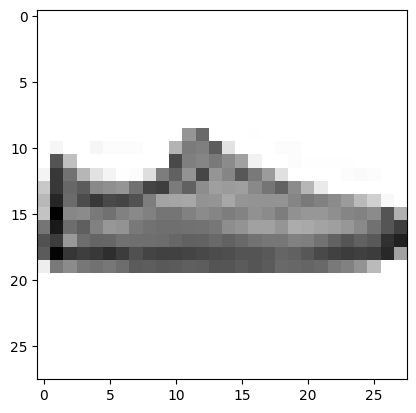

In [85]:
plt.imshow(img, cmap="binary")

In [87]:
print(class_names[true_class], true_class)

Sneaker 7


In [80]:
pred

array([2.7597473e-06, 2.0377716e-05, 4.9266082e-06, 3.7814365e-04,
       7.4702798e-06, 6.9676208e-01, 1.2156931e-07, 2.7983847e-01,
       2.2981146e-02, 4.5500451e-06], dtype=float32)

In [82]:
# Why does the prediction look like this? -> softmax activation, 10 classes
for i in range(10):
    print(f"{pred[i]:.2f} - {class_names[i]}")

0.00 - T-shirt/top
0.00 - Trouser
0.00 - Pullover
0.00 - Dress
0.00 - Coat
0.70 - Sandal
0.00 - Shirt
0.28 - Sneaker
0.02 - Bag
0.00 - Ankle boot


In [89]:
# Highest value?
pred.max()

0.6967621

In [92]:
# Which class has the highest prediction?
class_names[pred.argmax()]

'Sandal'

In [93]:
# Turn all predictions into predicted classes (0, 1, 2 ... or 9)
predicted_classes = np.argmax(y_predicted, axis=-1)

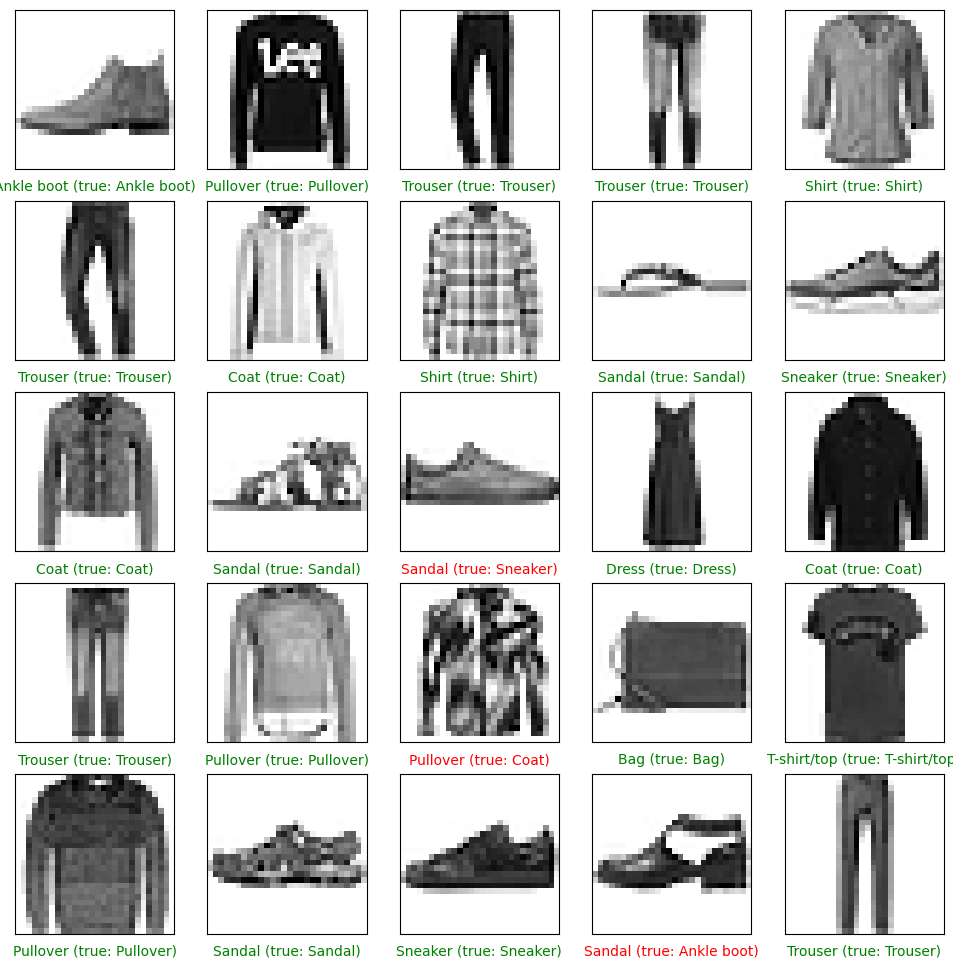

In [94]:
plt.figure(figsize=(12, 12))
for i in range(25):
    
    # Get true class for current image
    true_class = class_names[y_test[i]]
    
    # Get prediction
    prediction = y_predicted[i]
    predicted_class = class_names[np.argmax(prediction)]
    
    text = f"{predicted_class} (true: {true_class})"
    
    color = "green" if predicted_class == true_class else "red"
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap="binary")
    plt.xlabel(text, color=color)
plt.show()

In [36]:
# Get accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 [==============================] - 0s 981us/step - loss: 0.3413 - accuracy: 0.8849
Test accuracy: 88.49%


In [95]:
# Show confusion matrix for test dataset
conf_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=predicted_classes)

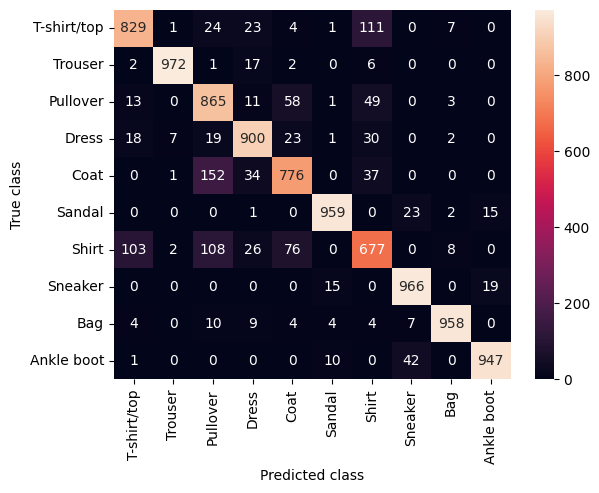

In [96]:
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

## Model evaluation 2) k-fold cross-validation

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/kfold.png" width="600" align="left">

In [45]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()
x = x / 255.0
x_test = x_test / 255.0

In [46]:
# Set up 5-fold cross-validation
kfold = sklearn.model_selection.KFold(n_splits=5, shuffle=True)

accuracy_list = []
fold = 1

for train_idx, val_idx in kfold.split(x_train):
    
    # Training folds
    x_train = x[train_idx]
    y_train = y[train_idx]
    
    # Validation fold
    x_val = x[val_idx]
    y_val = y[val_idx]
    
    # MLP
    model = build_model()
    
    # Train
    model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=0)
    # Evaluate
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    
    print(f"Fold {fold}: Accuracy {val_acc:.4f}")
    accuracy_list.append(val_acc)
    fold += 1

Fold 1: Accuracy 0.8562
Fold 2: Accuracy 0.8551
Fold 3: Accuracy 0.8425
Fold 4: Accuracy 0.8547
Fold 5: Accuracy 0.8581


In [47]:
mean_val_accuracy = np.mean(accuracy_list) * 100
print(f"Mean validation accuracy (5-fold CV): {mean_val_accuracy:.2f} %")

Mean validation accuracy (5-fold CV): 85.33 %


<br><br><br>


# Part 2: Image segmentation

In [3]:
import imageio as io
import os
import pandas as pd

In [4]:
# Another version of BAGLS dataset:
# More data than in MiniBAGLS, images cropped to 224 x 224 pixels
data_path = "C:/Data/Datasets/BAGLS_4096/"
file_names = os.listdir(data_path)
file_names.sort()

In [109]:
# get paths of images and masks
images = [data_path + x for x in file_names if not x.endswith('seg.png')]
masks = [x.split('.')[0]+'_seg.png' for x in images]

print(images[0])
print(masks[0])

C:/Data/Datasets/BAGLS_4096/10004.png
C:/Data/Datasets/BAGLS_4096/10004_seg.png


In [129]:
# Split data into training and test dataset
train_im, test_im, train_masks, test_masks = train_test_split(images, masks, test_size=0.25, random_state=42)

print(len(train_im), len(test_im))

3072 1024


In [130]:
def load_data(image_paths, mask_paths):
    # Load images
    X = np.asarray([io.imread(img, as_gray=True) for img in image_paths])
    # scale values to [0,1] range
    X = X.astype('float32') / 255.0
    # Add color dimension (1 because grayscale)
    X = np.expand_dims(X, axis=-1)

    # Load masks
    y = np.asarray([io.imread(mask) for mask in mask_paths])
    y = y.astype('float32') / 255.0
    y = np.expand_dims(y, axis=-1)
    
    print(f'Loaded images of shape {X.shape} and masks of shape {y.shape}')
    return X, y

In [131]:
# Load datasets
X_train, y_train = load_data(train_im, train_masks)
X_test, y_test = load_data(test_im, test_masks)

C:\Users\mario\AppData\Local\Temp\ipykernel_5820\1478145979.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X = np.asarray([io.imread(img, as_gray=True) for img in image_paths])
C:\Users\mario\AppData\Local\Temp\ipykernel_5820\1478145979.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  y = np.asarray([io.imread(mask) for mask in mask_paths])


Loaded images of shape (3072, 224, 224, 1) and masks of shape (3072, 224, 224, 1)
Loaded images of shape (1024, 224, 224, 1) and masks of shape (1024, 224, 224, 1)


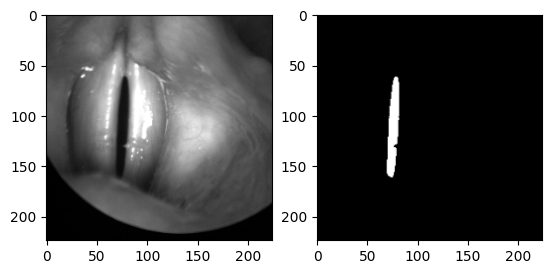

In [136]:
# Plot training image with mask (glottis)
def show_image_and_mask(x, y):
    plt.subplot(1,2,1)
    plt.imshow(x[...,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(y[...,0], cmap='gray')
    plt.show()
    
    
show_image_and_mask(X_train[0], y_train[0])

## Build U-Net

In [133]:
from keras.layers import Conv2D, Input, MaxPool2D, UpSampling2D, Activation, BatchNormalization, Concatenate
from keras.models import Model

**Original U-Net:**

Ronneberger, O., Fischer, P., & Brox, T. (2015, October). U-net: Convolutional networks for biomedical image segmentation. In _International Conference on Medical image computing and computer-assisted intervention_ (pp. 234-241). Springer, Cham.
    
<img align="left" src=https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png width=500>

In [134]:
# Simplified U-Net
# (2 encoder & decoder blocks, 16 initial filters)

def conv_block(x, num_filters):
    x = Conv2D(filters=num_filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=num_filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def build_Unet(filters=16, num_classes=1):
    # Input layer
    inputs = Input(shape=(224, 224, 1))
    
    # Encoder
    e1 = conv_block(inputs, filters)
    p1 = MaxPool2D((2, 2))(e1)
    
    e2 = conv_block(p1, filters * 2)
    p2 = MaxPool2D((2, 2))(e2)
    
    # Bottleneck
    b1 = conv_block(p2, filters * 16)
    
    # Decoder
    d1 = UpSampling2D()(b1)
    d1 = Concatenate()([d1, e2])
    d1 = conv_block(d1, filters * 8)
    
    d2 = UpSampling2D()(d1)
    d2 = Concatenate()([d2, e1])
    d2 = conv_block(d2, filters * 4)
    
    # Output layer
    outputs = Conv2D(filters=num_classes,
                     kernel_size=1,
                     padding='same',
                     activation='sigmoid')(d2)
    
    return Model(inputs, outputs)

In [135]:
unet = build_Unet()

In [140]:
for layer in unet.layers:
    if 'conv' in layer.name:
        print(layer.output_shape)  # (batch_size, height, width, channels)

(None, 224, 224, 16)
(None, 224, 224, 16)
(None, 112, 112, 32)
(None, 112, 112, 32)
(None, 56, 56, 256)
(None, 56, 56, 256)
(None, 112, 112, 128)
(None, 112, 112, 128)
(None, 224, 224, 64)
(None, 224, 224, 64)
(None, 224, 224, 1)


## Train U-Net

A great library for image segmentation: https://segmentation-models.readthedocs.io/

In [142]:
# !pip install segmentation-models

In [143]:
from segmentation_models.metrics import iou_score
from segmentation_models.losses import dice_loss
from keras.optimizers import Adam

# Compiling the model
model.compile(optimizer=Adam(learning_rate=1e-3),  # Define optimizer and learning rate
              loss=dice_loss,                      # Dice loss function
              metrics=[iou_score])                 # Intersection over Union (IoU) & Dice score

Segmentation Models: using `keras` framework.


In [ ]:
# Training
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50)
# Save model and history
model.save("unet.h5")
pd.DataFrame(history.history).to_csv("history.csv")

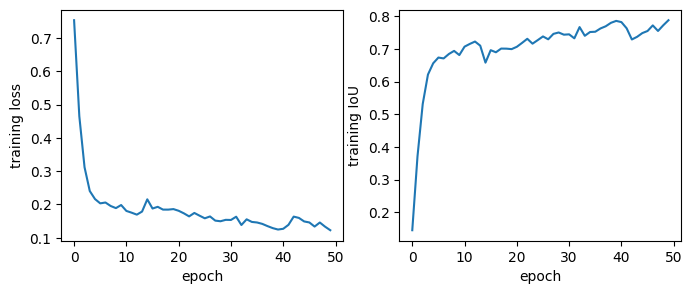

In [144]:
hist = pd.read_csv("history.csv")

# Plot loss for each epoch
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(hist["loss"])
plt.xlabel("epoch")
plt.ylabel("training loss")

# Plot IoU score for each epoch
plt.subplot(122)
plt.plot(hist["iou_score"])
plt.xlabel("epoch")
plt.ylabel("training IoU")
plt.show()

In [146]:
from keras.models import load_model

loaded_model = load_model("unet.h5", custom_objects={"iou_score": iou_score, "dice_loss": dice_loss}, compile=False)

## Check predictions for test data

In [149]:
# Get predicted masks 
predictions = loaded_model.predict(X_test[:10])

1/1 [==============================] - 1s 1s/step


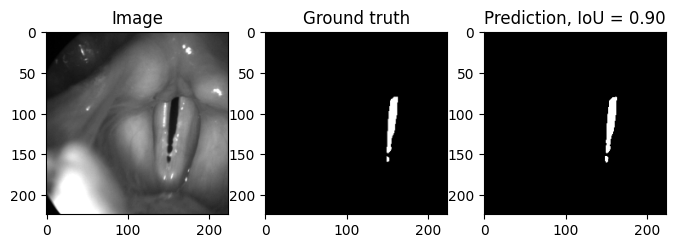

In [154]:
idx = 4

img = X_test[idx]
mask = y_test[idx]
pred = predictions[idx]

# IoU score
iou = iou_score(mask, pred)

# Plot image, ground truth and prediction
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Image')
plt.imshow(img[...,0], cmap='gray')

plt.subplot(1,3,2)
plt.title('Ground truth')
plt.imshow(mask[...,0], cmap='gray')

plt.subplot(1,3,3)
plt.title('Prediction, IoU = {:.2f}'.format(iou))
plt.imshow(pred[...,0], cmap='gray')
plt.show()